In [374]:
# Import một số thư viện
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

## Tiền xử lý dữ liệu và làm sạch
##### Trong dữ liệu trên có cả biến phân loại và biến số.
##### Mục đích là để dự đoán sơ gan. Bệnh sơ gan thì gồm có 4 giai đoạn.
##### Stage 1 : Normal
##### Stage 2 : Fatty Liver
##### Stage 3 : Liver Fibrosis
##### Stage 4 : Liver Cirrhosis 

In [375]:
# Đọc dữ liệu
real_df = pd.read_csv("../data/cirrhosis.csv")
real_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [376]:
real_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [377]:
real_df.shape

(418, 20)

In [378]:
real_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
ID,1,2,3,4,5,6,7,8,9,10,...,409,410,411,412,413,414,415,416,417,418
N_Days,400,4500,1012,1925,1504,2503,1832,2466,2400,51,...,1067,1072,1119,1097,989,681,1103,1055,691,976
Status,D,C,D,D,CL,D,C,D,D,D,...,C,C,C,C,C,D,C,C,C,C
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo,Placebo,Placebo,Placebo,D-penicillamine,Placebo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,21464,20617,25594,19994,13918,24201,20284,19379,15526,25772,...,15706,14245,18628,24472,12784,24472,14245,20819,21185,19358
Sex,F,F,M,F,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
Ascites,Y,N,N,N,N,N,N,N,N,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,Y,Y,N,Y,Y,Y,Y,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,Y,Y,N,Y,Y,N,N,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,Y,N,S,S,N,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N


In [379]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [380]:
real_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [381]:
real_df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

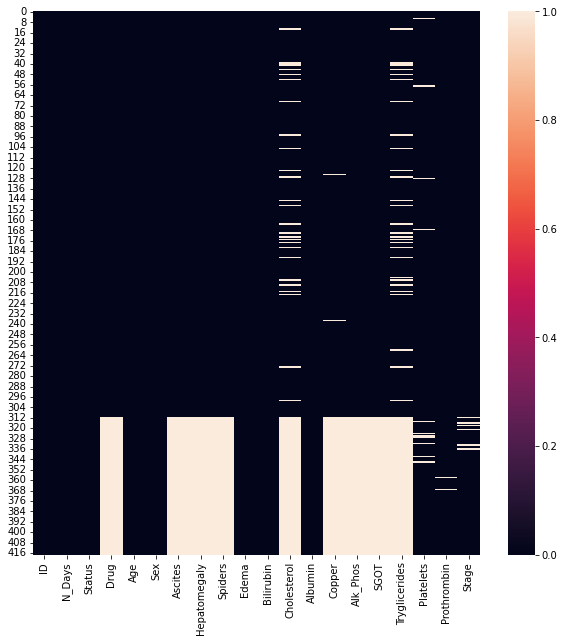

In [382]:
plt.figure(figsize=[10,10])
sns.heatmap(real_df.isnull())

In [383]:
# Xóa một số giá trị null trong thuộc tính mục tiêu
df1 = real_df.drop(real_df[real_df['Stage'].isnull()].index)
df1.reset_index(drop=True, inplace=True) # reset the index(inplace=True là tạo ra một df mới, drop=True tạo một chỉ mục index mới)
df1

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
408,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
409,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
410,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


<AxesSubplot:>

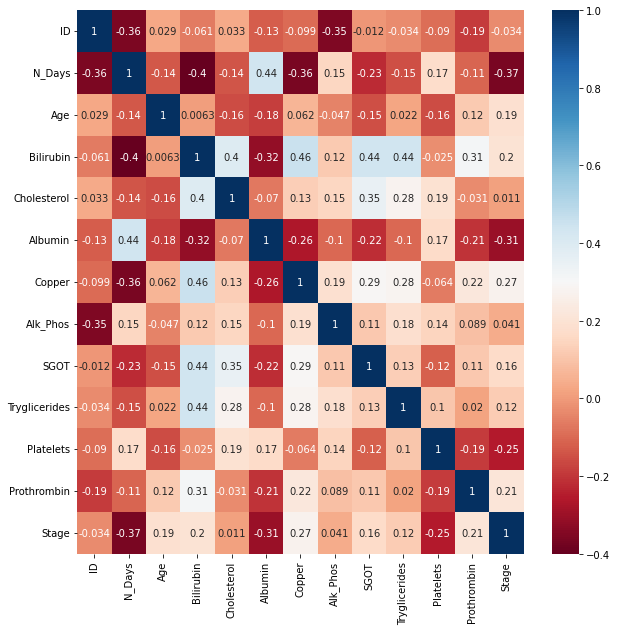

In [384]:
# Tìm mối tương quan giữa các thuộc tính và mục tiêu
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="RdBu", annot=True)  # annot=True viết dữ liệu lên mỗi cell

##### Điền các giá trị số null bằng cách chọn ngẫu nhiên các giá trị giữa giá trị tối thiểu và tối đa có thể có trong giai đoạn đó của xơ gan và giá trị phân loại null theo giá trị lặp lại nhiều nhất

In [385]:
df2 = df1.dropna() # Xóa tất cả các giá trị null trong dataframe và copy tới df2
df2.shape

(276, 20)

In [386]:
# Tìm giá trị min, max của mỗi thuộc tính và giai đoạn bệnh bằng việc xóa đi các điểm ngoại lai
def max_min_collect(df, column_list):
    
    max_min_list = []
    for col in column_list:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1 # interquartile range
        x=[abs(1.5 * IQR - Q1), abs(Q3 + 1.5 * IQR)] # x > Q1 - 1.5 * IQR, x < Q3 + 1.5 * IQR, ngoài ra là các điểm ngoại lai
        max_min_list.append(x)
        
    return max_min_list

In [387]:
check_normal1 = df2.groupby(['Stage']) # Nhóm các giai đoạn 
stage_1_1 = check_normal1.get_group(1)
stage_2_1 = check_normal1.get_group(2)
stage_3_1 = check_normal1.get_group(3)
stage_4_1 = check_normal1.get_group(4)

In [388]:
list_num = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']# numerical value column list
stage_names = [stage_1_1, stage_2_1, stage_3_1, stage_4_1] 
min_max_for_all_stages = []
for i in stage_names:
    max_min_value = max_min_collect(i,list_num)
    min_max_for_all_stages.append(max_min_value)
min_max_for_all_stages  

[[[157.5, 311.5],
  [64.75, 163.25],
  [245.375, 2101.625],
  [3.82500000000001, 159.07500000000002],
  [27.5, 135.5],
  [112.375, 433.375],
  [8.462499999999999, 12.5625]],
 [[35.75, 637.75],
  [46.5, 165.5],
  [610.0, 3346.0],
  [17.91250000000001, 232.38750000000002],
  [1.0, 223.0],
  [56.75, 510.75],
  [8.700000000000003, 11.899999999999999]],
 [[10.75, 688.75],
  [67.75, 234.25],
  [788.75, 3821.25],
  [22.412499999999966, 262.68749999999994],
  [24.5, 279.5],
  [41.25, 499.25],
  [8.325000000000003, 12.524999999999999]],
 [[44.875, 573.875],
  [105.625, 333.375],
  [768.625, 3894.375],
  [15.781249999999972, 266.76874999999995],
  [6.375, 244.625],
  [61.125, 507.875],
  [8.700000000000001, 13.499999999999998]]]

In [389]:
check_normal = df1.groupby(['Stage']) #group the stages for df1
stage_1 = check_normal.get_group(1)
stage_2 = check_normal.get_group(2)
stage_3 = check_normal.get_group(3)
stage_4 = check_normal.get_group(4)

In [390]:
stages = [stage_1,stage_2,stage_3,stage_4]

In [391]:
# Thay các đối tượng drug, ascites, hemetomegally, spiders bằng các giá
# trị lặp lại nhiều nhất
def dtype_obj_fillnull(stage_list):
    
    for stage_range in stage_list:
        
        # Kiểm tra xem các bản ghi trong từng nhóm có giá trị null hay không
        x1 = stage_range.select_dtypes(include='object')
        x1 = x1.columns[x1.isna().any()].tolist()
        # print(x1)
        for i in x1:
            # Các chỉ số theo từng cột, từng lớp mà có giá trị null
            collect_null_index = stage_range[stage_range[i].isnull()].index.tolist()
            # print(collect_null_index)
            get_repeat_value = stage_range[i].mode()[0] # lấy giá trị xuất hiện nhiều nhất
            # print(get_repeat_value)
            for j in collect_null_index:

                df1.loc[[j],i] = get_repeat_value
            
    return df1

In [392]:
after_obj_null_correction = dtype_obj_fillnull(stages) 
after_obj_null_correction.isnull().sum() 

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [393]:
# Điền giá trị số null bằng giá trị ngẫu nhiên trong khoảng từ min -> max theo từng lớp và từng cột
def dtype_num_fillnull(stage_list):
    
    for stage_range in stage_list:
        
        x1 = stage_range.select_dtypes(exclude='object')
        x1 = x1.columns[x1.isna().any()].tolist()
        
        z=0
        
        for i in range(0, len(x1)):

            collect_null_index = stage_range[stage_range[x1[i]].isnull()].index.tolist()

            for j in collect_null_index:
                
                if i != 3: # SGOT has 2 decimal values eg:213.87 
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 1)
                else:
                     get_random_value = round(random.uniform(min_max_for_all_stages[z][i][0], min_max_for_all_stages[z][i][1]), 2)

                after_obj_null_correction.loc[[j],x1[i]] = get_random_value
        z+=1
            
    return after_obj_null_correction

In [394]:
after_num_null_correction =  dtype_num_fillnull(stages)
after_num_null_correction.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [395]:
after_num_null_correction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           412 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        412 non-null    object 
 7   Hepatomegaly   412 non-null    object 
 8   Spiders        412 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    412 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         412 non-null    float64
 14  Alk_Phos       412 non-null    float64
 15  SGOT           412 non-null    float64
 16  Tryglicerides  412 non-null    float64
 17  Platelets      412 non-null    float64
 18  Prothrombi

In [396]:
after_num_null_correction['Age'] = (after_num_null_correction['Age']/365).astype('int64') # convert age to years
after_num_null_correction

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,681,D,Placebo,67,F,N,N,N,N,1.2,189.0,2.96,157.4,547.2,23.28,68.5,174.0,10.9,3.0
408,415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,287.8,3.83,150.8,1634.4,90.10,106.4,180.0,11.2,4.0
409,416,1055,C,Placebo,57,F,N,N,N,N,1.6,184.6,3.42,95.5,510.0,41.62,37.8,143.0,9.9,3.0
410,417,691,C,Placebo,58,F,N,N,N,N,0.8,163.5,3.75,122.3,1683.9,7.29,117.9,269.0,10.4,3.0


<AxesSubplot:>

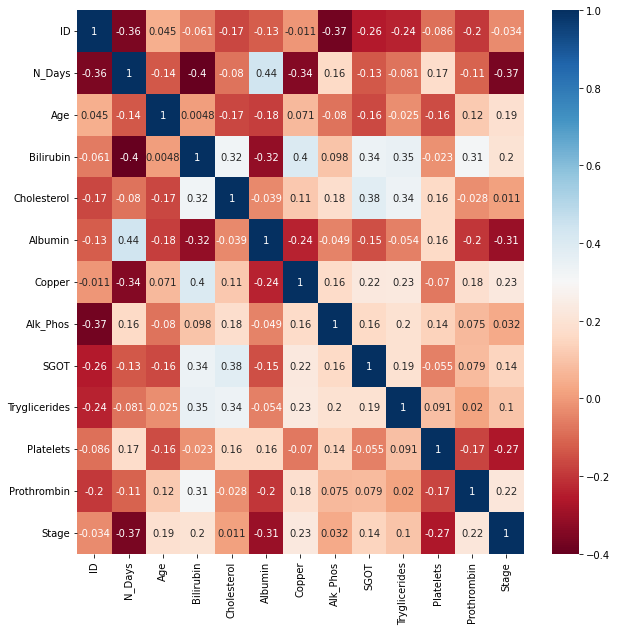

In [397]:
plt.figure(figsize=(10,10))
sns.heatmap(after_num_null_correction.corr(), cmap="RdBu", annot=True)

In [398]:
after_num_null_correction.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


<module 'matplotlib.pyplot' from 'C:\\Users\\dovan\\anaconda3\\envs\\course\\lib\\site-packages\\matplotlib\\pyplot.py'>

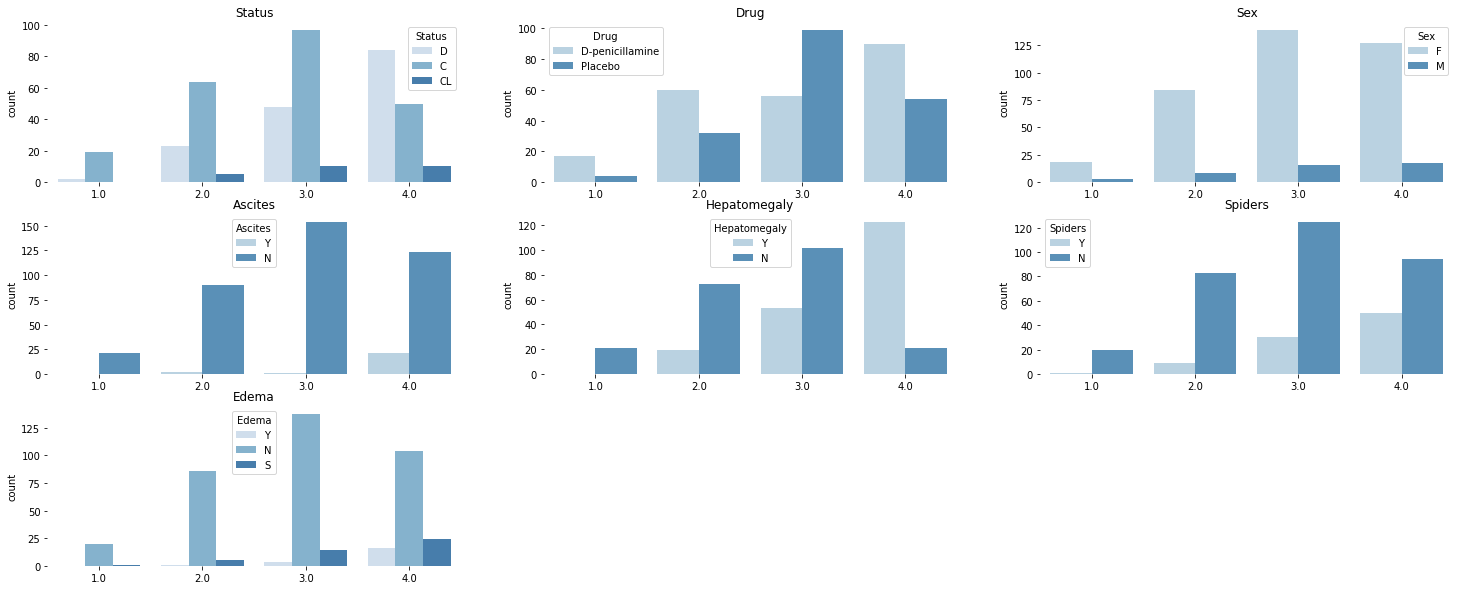

In [399]:
def plot_object(obj_col_list):
    c = 1
    for i in obj_col_list:
        plt.subplot(3, 3, c)
        # Hiển thị biểu đồ phân bố từng lớp dữ liệu
        sns.countplot(x=after_num_null_correction['Stage'], hue = after_num_null_correction[i], palette='Blues', alpha=0.9)
        sns.despine(top=True, right=True, bottom=True, left=True)
#         plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
        plt.xlabel('')
        plt.title(i)
        c+=1
    return plt

plt.figure(figsize=(25.2, 10))
list_obj_toplot = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
plot_object(list_obj_toplot)

In [400]:
# Mã hóa các thuộc tính catagorical
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
le = preprocessing.LabelEncoder()
for col in categorical_cols:
    after_num_null_correction[col] = le.fit_transform(after_num_null_correction[col])

In [401]:
df = after_num_null_correction.copy()

In [402]:
df = df.drop(['ID'], axis=1)
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,58,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,1012,2,0,70,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,1925,2,0,54,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
4,1504,1,1,38,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2


In [403]:
label = df["Stage"]
df.drop("Stage", axis=1, inplace=True)
# df.head()
label

0      3
1      2
2      3
3      3
4      2
      ..
407    2
408    3
409    2
410    2
411    3
Name: Stage, Length: 412, dtype: int64

In [404]:
categorical_features=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df[categorical_features]=df[categorical_features].astype("category")

In [405]:
continuous_features=set(df.columns) - set(categorical_features)
# scaler = StandardScaler()
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(df[list(continuous_features)])
# # df_norm=pd.DataFrame(df_norm,columns=list(continuous_features))
df_norm

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.075515,2,0,0.615385,0,1,1,1,2,0.512635,0.085196,0.238806,0.260274,0.106832,0.295626,0.252500,0.255489,0.389474
1,0.937947,0,0,0.576923,0,0,1,1,0,0.028881,0.109970,0.813433,0.085616,0.524336,0.241733,0.105106,0.317365,0.221053
2,0.204249,2,0,0.846154,1,0,0,0,1,0.039711,0.033837,0.567164,0.352740,0.018431,0.203305,0.047201,0.177645,0.368421
3,0.396298,2,0,0.538462,0,0,1,1,1,0.054152,0.074924,0.216418,0.102740,0.430713,0.125058,0.112125,0.241517,0.189474
4,0.307741,1,1,0.230769,0,0,1,1,0,0.111913,0.096073,0.585821,0.238014,0.029830,0.240917,0.077031,0.147705,0.252632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.134623,2,1,0.788462,0,0,0,0,0,0.032491,0.041692,0.373134,0.262671,0.020725,0.042664,0.070890,0.223553,0.252632
408,0.223391,0,0,0.250000,0,0,1,0,0,0.021661,0.101390,0.697761,0.251370,0.100684,0.190069,0.137393,0.235529,0.284211
409,0.213294,0,1,0.596154,0,0,0,0,0,0.046931,0.039033,0.544776,0.156678,0.017989,0.083122,0.017021,0.161677,0.147368
410,0.136727,0,1,0.615385,0,0,0,0,0,0.018051,0.026284,0.667910,0.202568,0.104324,0.007390,0.157572,0.413174,0.200000


In [406]:
# Tạo ra biến chỉ số cho mỗi thành phần thuộc tính không liên tục
df_norm_dummies=pd.get_dummies(df_norm)
df_norm_dummies

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_1,Ascites_0,Ascites_1,Hepatomegaly_0,Hepatomegaly_1,Spiders_0,Spiders_1,Edema_0,Edema_1,Edema_2
0,0.075515,0.615385,0.512635,0.085196,0.238806,0.260274,0.106832,0.295626,0.252500,0.255489,...,0,0,1,0,1,0,1,0,0,1
1,0.937947,0.576923,0.028881,0.109970,0.813433,0.085616,0.524336,0.241733,0.105106,0.317365,...,0,1,0,0,1,0,1,1,0,0
2,0.204249,0.846154,0.039711,0.033837,0.567164,0.352740,0.018431,0.203305,0.047201,0.177645,...,1,1,0,1,0,1,0,0,1,0
3,0.396298,0.538462,0.054152,0.074924,0.216418,0.102740,0.430713,0.125058,0.112125,0.241517,...,0,1,0,0,1,0,1,0,1,0
4,0.307741,0.230769,0.111913,0.096073,0.585821,0.238014,0.029830,0.240917,0.077031,0.147705,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.134623,0.788462,0.032491,0.041692,0.373134,0.262671,0.020725,0.042664,0.070890,0.223553,...,0,1,0,1,0,1,0,1,0,0
408,0.223391,0.250000,0.021661,0.101390,0.697761,0.251370,0.100684,0.190069,0.137393,0.235529,...,0,1,0,0,1,1,0,1,0,0
409,0.213294,0.596154,0.046931,0.039033,0.544776,0.156678,0.017989,0.083122,0.017021,0.161677,...,0,1,0,1,0,1,0,1,0,0
410,0.136727,0.615385,0.018051,0.026284,0.667910,0.202568,0.104324,0.007390,0.157572,0.413174,...,0,1,0,1,0,1,0,1,0,0


<AxesSubplot:>

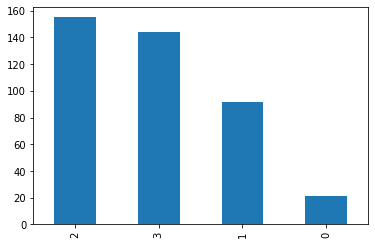

In [407]:
label.value_counts().plot(kind="bar")

In [408]:
import pickle

with open('cirrhosis/X.pkl', 'wb') as f:
    pickle.dump(df_norm_dummies, f)

with open('cirrhosis/y.pkl', 'wb') as f:
    pickle.dump(label, f)